# Importar paquetes

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Funciones

In [2]:
def hist_boxplot(label = str, df = pd.DataFrame()):
    
    """
        docstring:

        variables de entrada:

            - label: columna o variable a graficar (str)
            - df: dataframe o dataset ( pd.DataFrame)

        variable de salida:

            - Ninguna

        Respuesta:

            - Histograma de frecuencias y Boxplot
      
    """

    fig, axs = plt.subplots(2, 1, figsize = (7, 9))

    axs[0].hist(df[label], bins = 100)
    axs[0].set_ylabel("Frequency")
    axs[0].axvline(df[label].mean(), color = "magenta", linestyle = "dashed", linewidth = 1.5)
    axs[0].axvline(df[label].median(), color = "cyan", linestyle = "dashed", linewidth = 1.5)

    axs[1].boxplot(df[label], vert = False)
    axs[1].set_xlabel(label);

In [ ]:
def get_iqr_values(df_in, col_name, std_limit = 1.5):
    
    median = df_in[col_name].median()    
    q1 = df_in[col_name].quantile(0.25) 
    q3 = df_in[col_name].quantile(0.75)     
    iqr = q3 - q1 
    minimum = q1-std_limit*iqr 
    maximum = q3+std_limit*iqr
    
    return median, q1, q3, iqr, minimum, maximum

def remove_outliers(df_in, col_name):
    
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name, std_limit = 1.5)
    df_out = df_in.loc[(df_in[col_name] > minimum) & 
                       (df_in[col_name] < maximum)]
    
    return df_out

def count_outliers(df_in, col_name):
    
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name, std_limit = 1.5)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | 
                            (df_in[col_name] >= maximum)]
    
    return df_outliers.shape[0]


def remove_all_outliers(df_in, col_name):
    
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 100):
            break

        df_in = remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    
    return df_in 

def get_iqr_text(df_in, col_name):
    
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name, std_limit = 1.5)
    median_text = f"median={median:.2f}"
    q1_text = f"q1={q1:.2f}"
    q3_text = f"q3={q3:.2f}"
    iqr_text = f"iqr={iqr:.2f}"
    minimum_text = f"minimum={minimum:.2f}"
    maximum_text = f"maximum={maximum:.2f}"
    text = median_text + " " + q1_text + " " + q3_text + " " + iqr_text + " " + minimum_text + " " + maximum_text
    
    return text

def box_plot_graph(df_in, col_name):
    
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

# Importar dataset

In [3]:
path_data = "./datasets/"
file_data = "diabetes2.csv"
full_path = os.path.join(path_data, file_data)
df = pd.read_csv(full_path, sep = ",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df_diabetes = df.copy()

# Exploracion de los datos

In [5]:
print(f"Cantidad de filas y columns con Outliers\n")
print(f"Cantidad de filas: -------> {df_diabetes.shape[0]}")
print(f"Cantidad de columnas: ----> {df_diabetes.shape[1]}")

Cantidad de filas y columns con Outliers

Cantidad de filas: -------> 768
Cantidad de columnas: ----> 9


In [6]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Visualizaciones

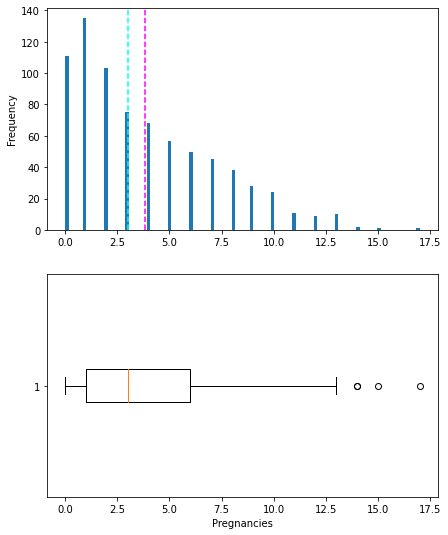

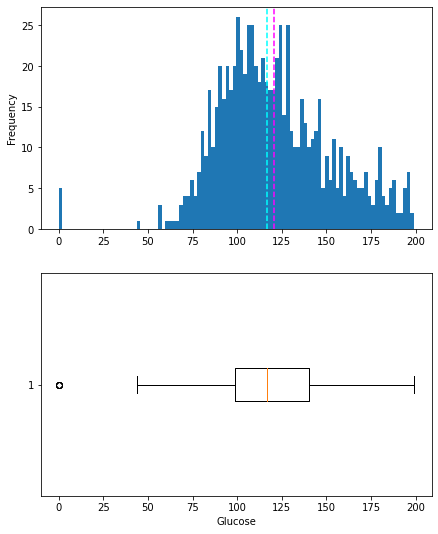

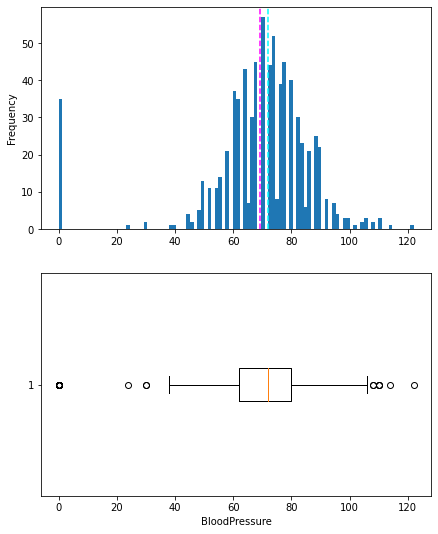

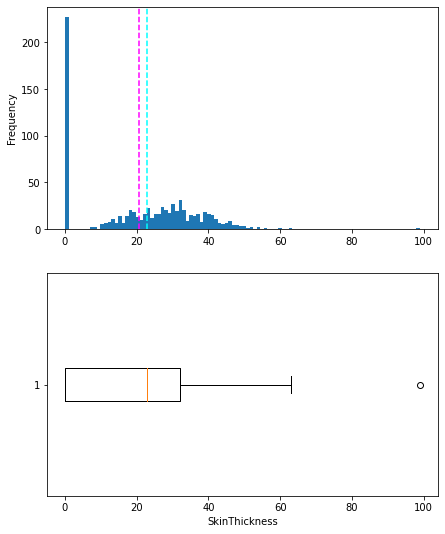

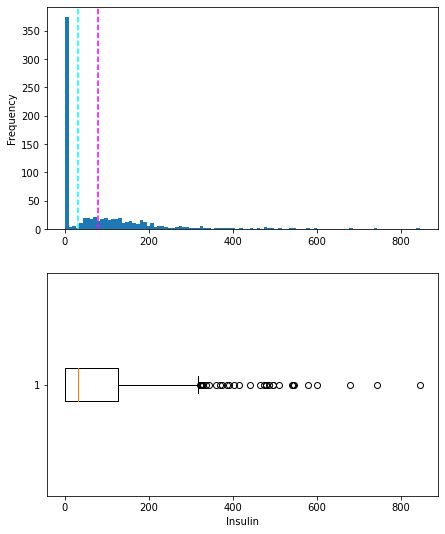

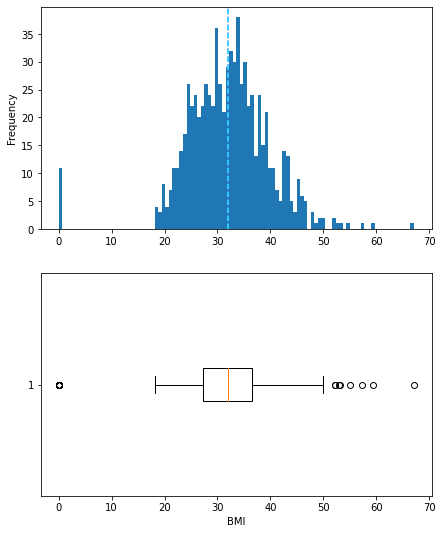

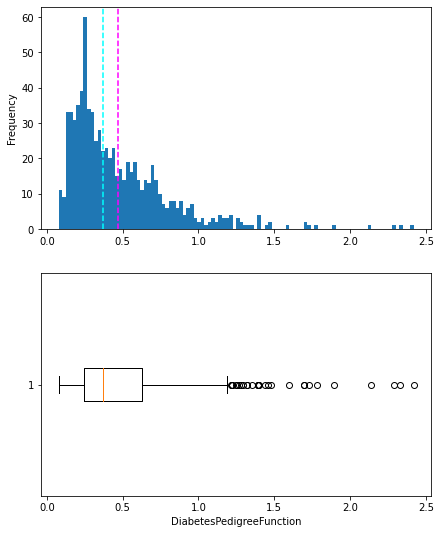

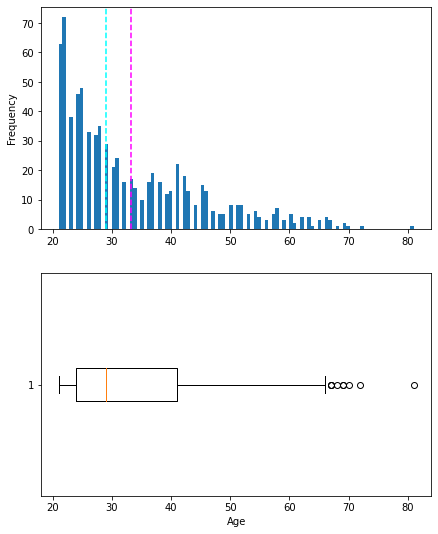

In [8]:
for col in df_diabetes.columns.tolist():
    if col != "Outcome":
        hist_boxplot(label = col, df = df_diabetes)
    else:
        pass

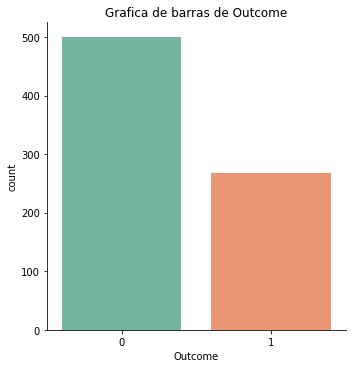

In [9]:
sns.catplot(data = df_diabetes, x = "Outcome", kind = "count", palette = "Set2")
plt.title("Grafica de barras de Outcome");

In [10]:
def sns_catplot(df = pd.DataFrame(), label = str, col = str, rotation = 0):
    
    sns.catplot(data = df, 
                x = col, 
                kind = "count", 
                hue = label, 
                palette = "pastel", 
                legend = False)

    plt.legend(loc = "upper right", labels = ["No diabetico", "Diabetico"])
    plt.xticks(rotation = rotation)
    plt.title("Diabetes VS Embarazos");    

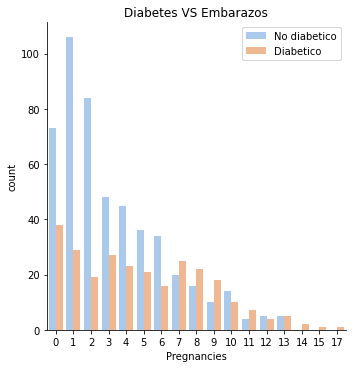

In [11]:
sns_catplot(df = df_diabetes, label = "Outcome", col = "Pregnancies")

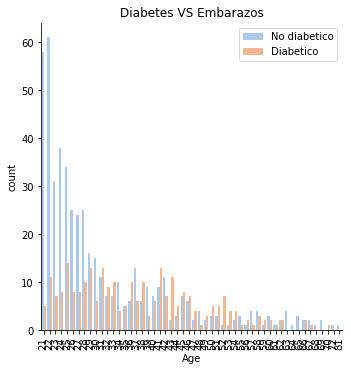

In [12]:
sns_catplot(df = df_diabetes, label = "Outcome", col = "Age", rotation = 90)

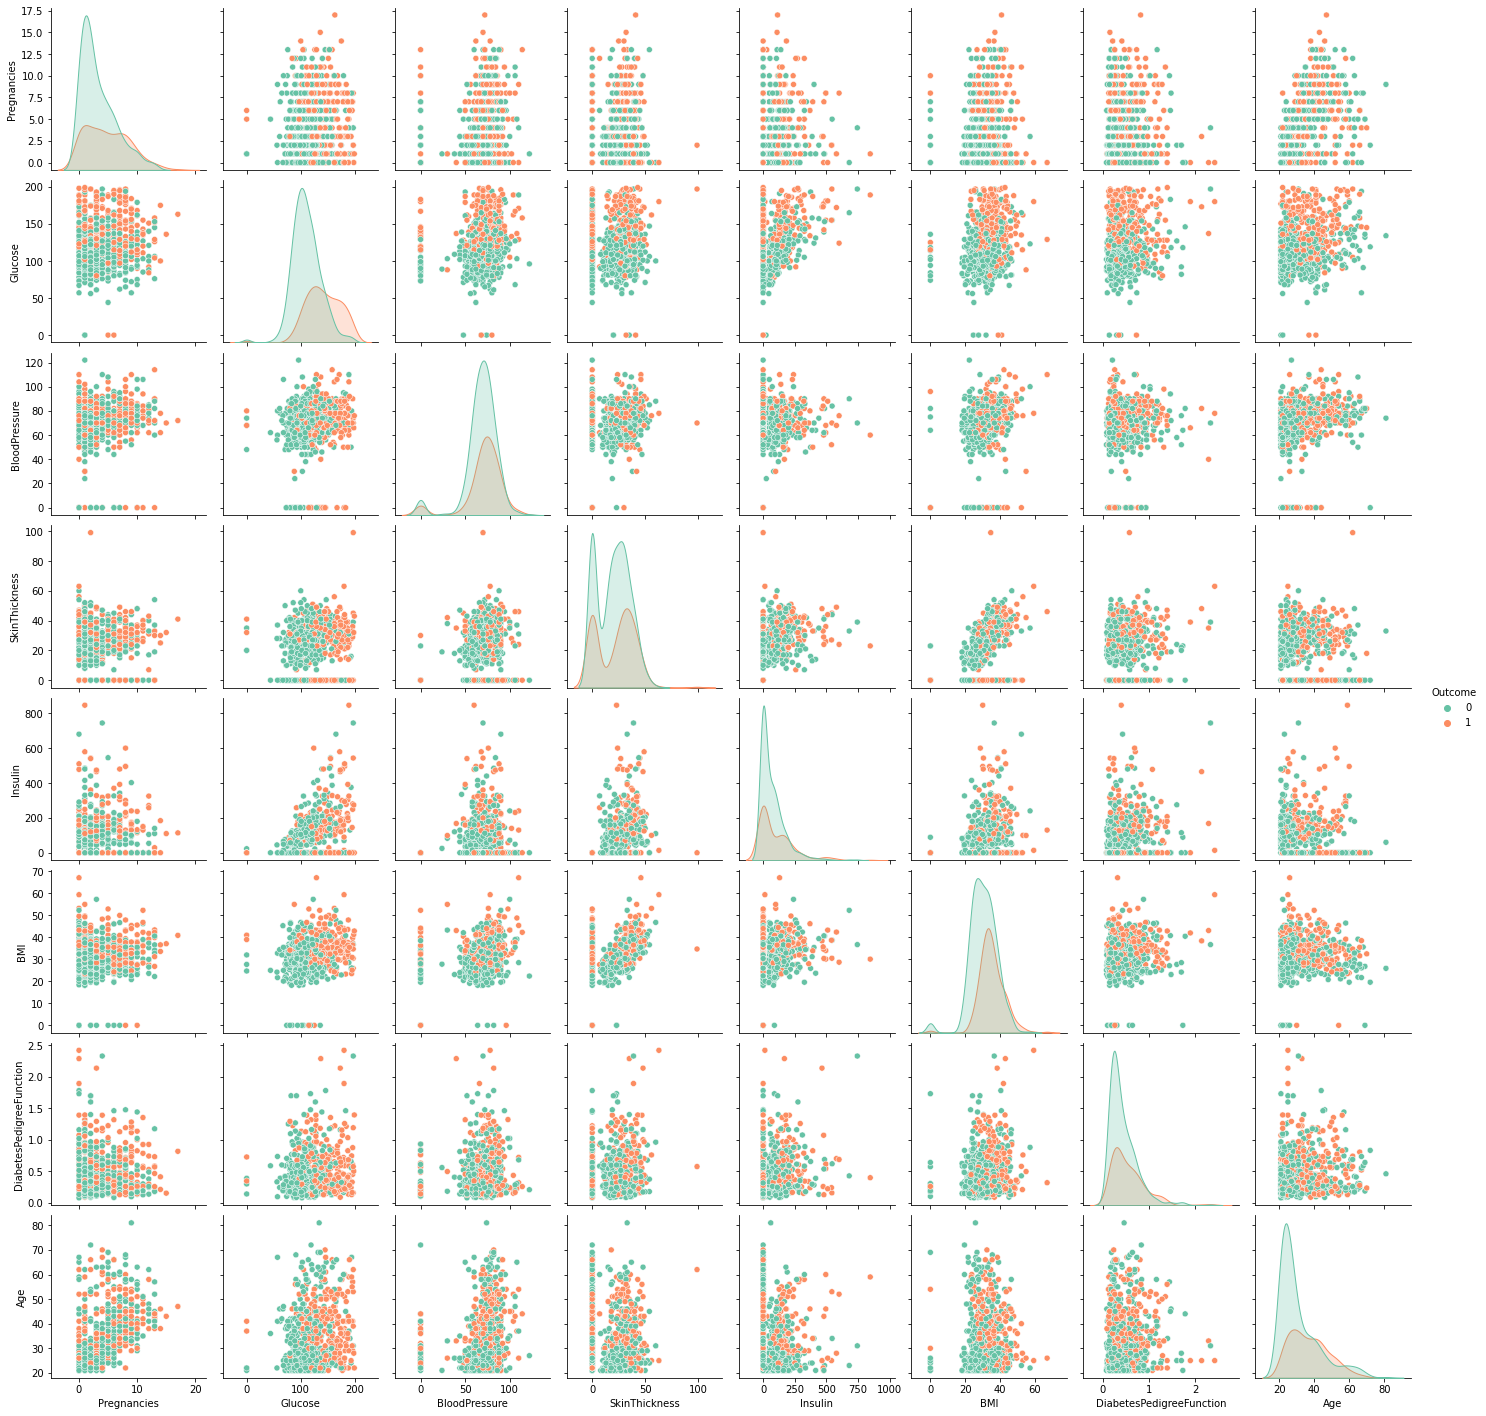

In [13]:
sns.pairplot(df_diabetes, hue = "Outcome", palette = "Set2")

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

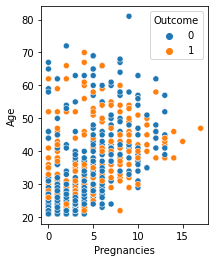

In [14]:
plt.figure(figsize = (3, 4))
sns.scatterplot(df_diabetes["Pregnancies"], 
                df_diabetes["Age"], 
                hue = df_diabetes["Outcome"], 
                legend = True)

In [15]:
df_diabetes["BMI"].corr(df_diabetes["SkinThickness"])

0.3925732041590385

# Eliminar valores Outliers

Pregnancies tiene 4 outliers


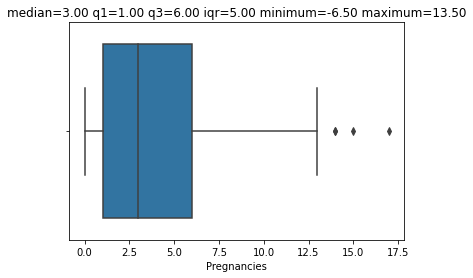

Glucose tiene 5 outliers


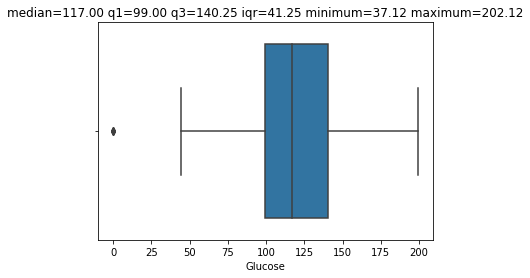

BloodPressure tiene 45 outliers


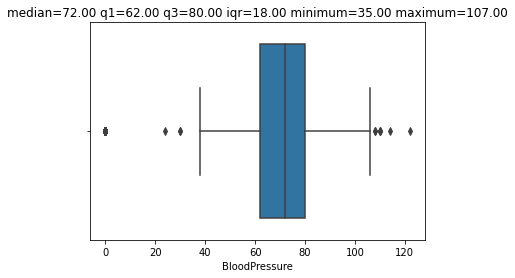

SkinThickness tiene 1 outliers


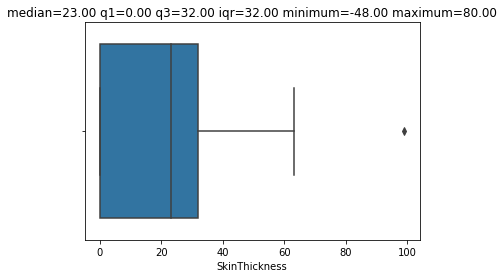

Insulin tiene 34 outliers


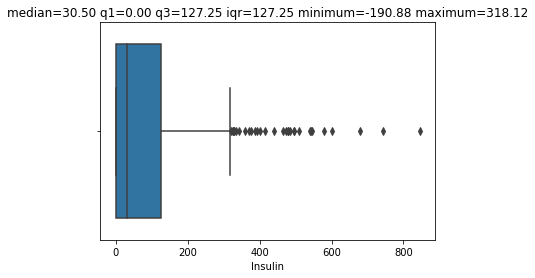

BMI tiene 19 outliers


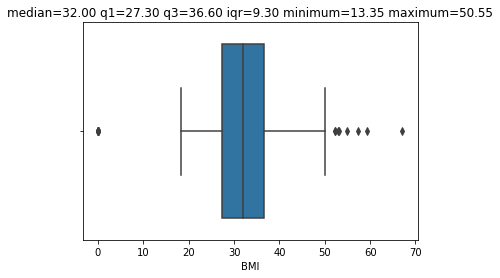

DiabetesPedigreeFunction tiene 29 outliers


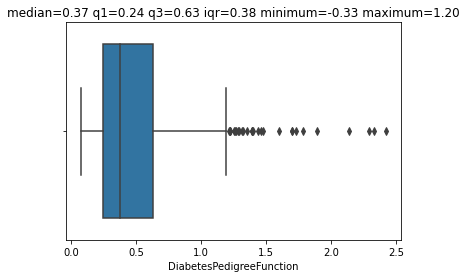

Age tiene 9 outliers


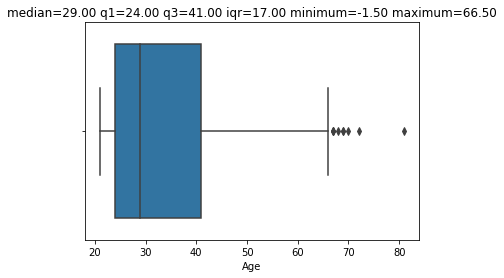

Outcome tiene 0 outliers


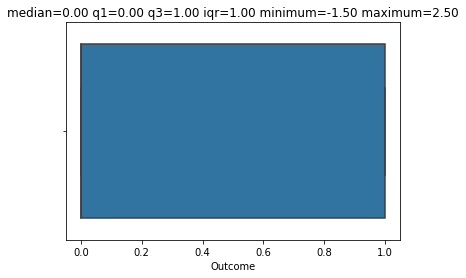

In [25]:
for col in df_diabetes:
    #df_diabetes = remove_all_outliers(df_diabetes, col)
    print(f"{col} tiene {count_outliers(df_diabetes, col)} outliers")
    box_plot_graph(df_diabetes, col)

Pregnancies tiene 0 outliers


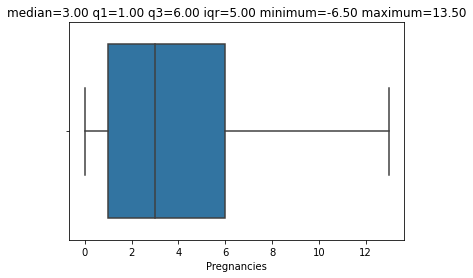

Glucose tiene 0 outliers


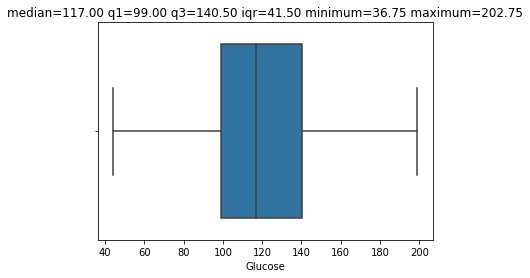

BloodPressure tiene 0 outliers


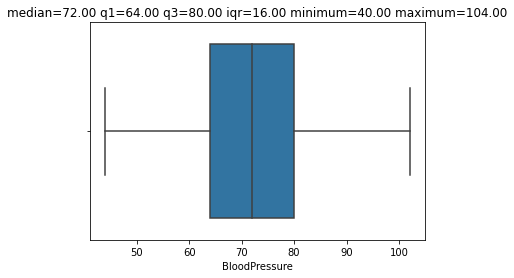

SkinThickness tiene 0 outliers


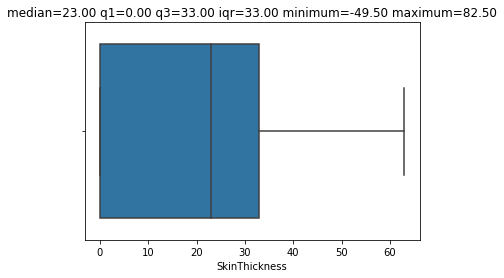

Insulin tiene 0 outliers


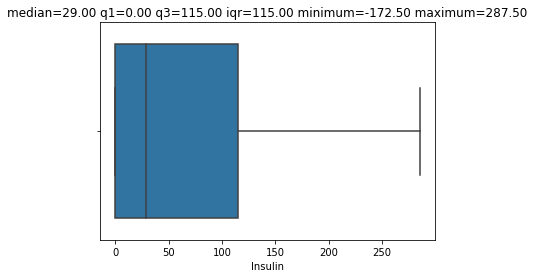

BMI tiene 0 outliers


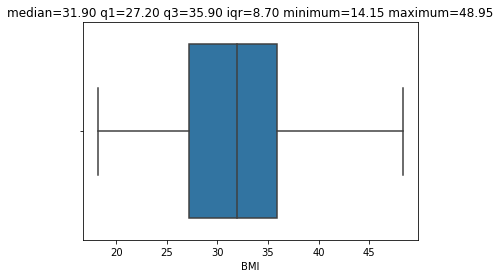

DiabetesPedigreeFunction tiene 0 outliers


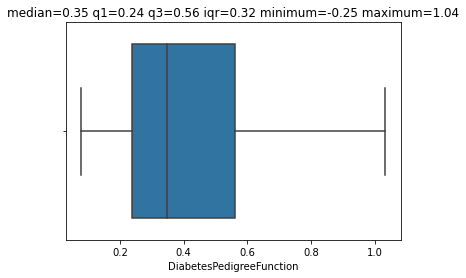

Age tiene 0 outliers


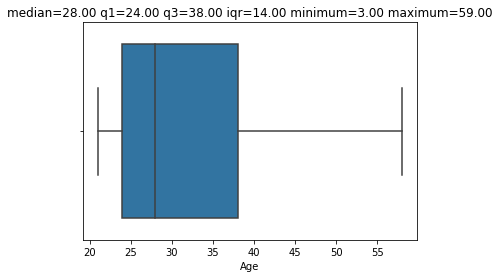

Outcome tiene 0 outliers


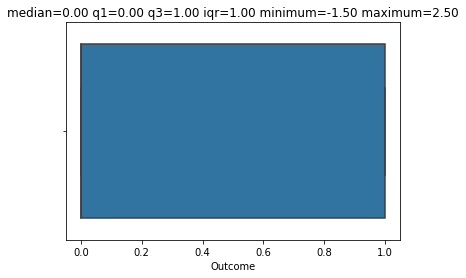

In [26]:
for col in df_diabetes:
    df_diabetes = remove_all_outliers(df_diabetes, col)
    print(f"{col} tiene {count_outliers(df_diabetes, col)} outliers")
    box_plot_graph(df_diabetes, col)

In [27]:
print(f"Cantidad de filas y columns sin Outliers\n")
print(f"Cantidad de filas: -------> {df_diabetes.shape[0]}")
print(f"Cantidad de columnas: ----> {df_diabetes.shape[1]}")

Cantidad de filas y columns sin Outliers

Cantidad de filas: -------> 586
Cantidad de columnas: ----> 9


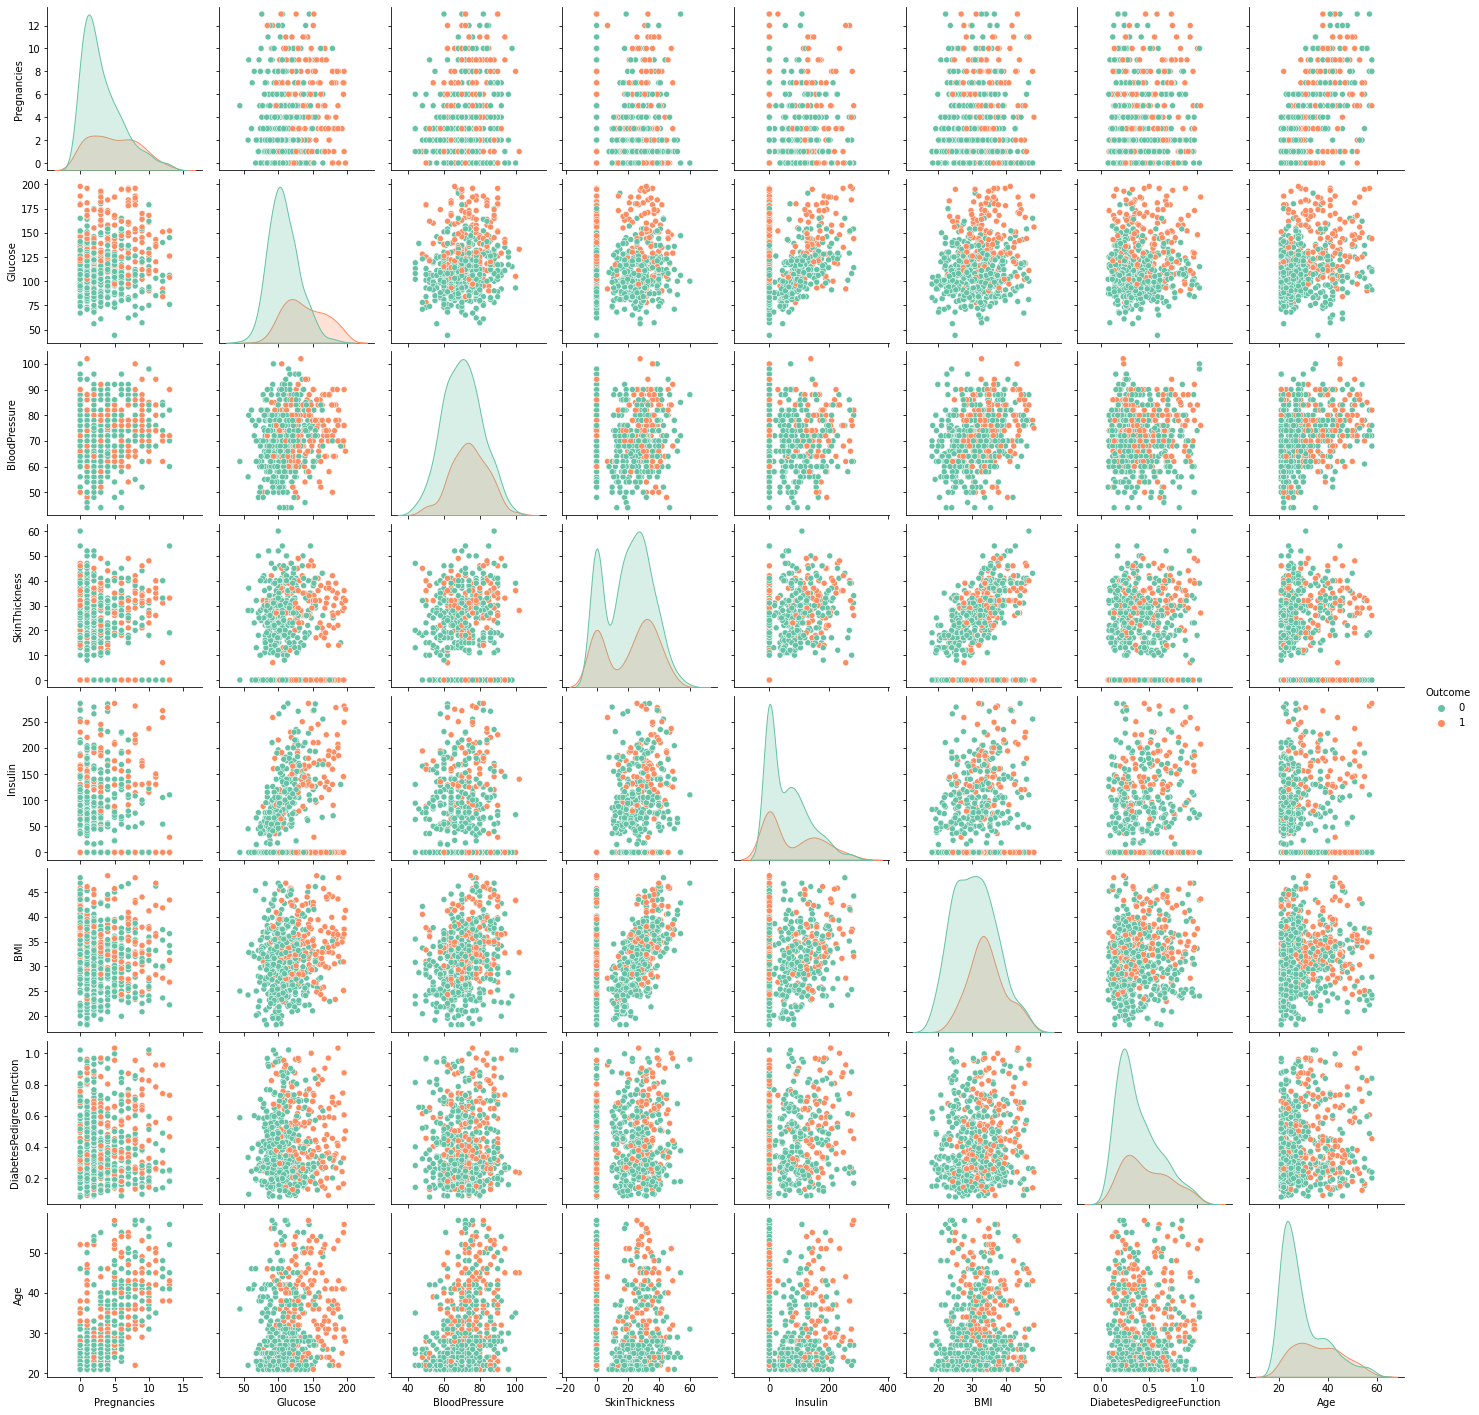

In [28]:
sns.pairplot(df_diabetes, hue = "Outcome", palette = "Set2")